<a href="https://colab.research.google.com/github/alastra32/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

##1.Load and clean the data (or determine the best method to drop observations when running tests)

In [0]:
### YOUR CODE STARTS HERE

#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from random import sample 


In [2]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n
republican,n,y,n,y,y,y,n,n,n,n,y,?,y,y,?,?
democrat,n,y,y,n,n,n,y,y,y,n,n,n,y,n,?,?
democrat,y,y,y,n,n,y,y,y,?,y,y,?,n,n,y,?
republican,n,y,n,y,y,y,n,n,n,n,n,y,?,?,n,?
republican,n,y,n,y,y,y,n,n,n,y,n,y,y,?,n,?
democrat,y,n,y,n,n,y,n,y,?,y,y,y,?,n,n,y
democrat,y,?,y,n,n,n,y,y,y,n,n,n,y,n,y,y
republican,n,y,n,y,y,y,n,n,n,n,n,?,y,y,n,n
democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
democrat,y,y,y,n,n,?,y,y,n,n,y,n,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,?,?,y,y
democrat,y,?,y,n,n,n,y,y,y,n,n,?,n,n,y,y
democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,

In [3]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of
      Representatives Congressmen on the 16 key votes identified by the
      CQA.  The CQA lists nine different types of votes: voted for, paired
      

In [4]:
col_headers=[ 'Class_Name', 'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
url='https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
votingdata=pd.read_csv(url,names=col_headers)
print(votingdata.shape)
votingdata.head()


(435, 17)


,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:
#converting yes to 1, no to 0 and ? to 0.5 as an abstain is neither yes or no, it's halfway in between.
votingdata.replace(to_replace= 'y'	,value=1,inplace=True)
votingdata.replace(to_replace= 'n'	,value=0,inplace=True)
votingdata.replace(to_replace= '?'	,value=0.5,inplace=True)
votingdata.head()

,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [0]:
#splitting into democrats and republicans

votingdatadem=votingdata[votingdata['Class_Name']=='democrat']
votingdatarep=votingdata[votingdata['Class_Name']=='republican']


In [16]:
print(votingdatadem.shape)
votingdatadem.head()

(267, 17)


,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,1.0


In [7]:
print(votingdatarep.shape)
votingdatarep.head()

(168, 17)


,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0,1.0,0.0,0.0


In [8]:
votingdata1=votingdata.melt(id_vars='Class_Name')
votingdata1.head()

,Class_Name,variable,value
0,republican,handicapped-infants,0.0
1,republican,handicapped-infants,0.0
2,democrat,handicapped-infants,0.5
3,democrat,handicapped-infants,0.0
4,democrat,handicapped-infants,1.0


In [9]:
votingdata1.columns=['Class','Issue','Vote']
votingdata1.head()

,Class,Issue,Vote
0,republican,handicapped-infants,0.0
1,republican,handicapped-infants,0.0
2,democrat,handicapped-infants,0.5
3,democrat,handicapped-infants,0.0
4,democrat,handicapped-infants,1.0


In [10]:
votingdata1.pivot_table(index='Issue', columns='Class', values='Vote', aggfunc='mean') #visualizing which topic might help for the hypothesis.

Class,democrat,republican
Issue,,
adoption-of-the-budget-resolution,0.878277,0.142857
aid-to-nicaraguan-contras,0.823970,0.175595
anti-satellite-test-ban,0.764045,0.250000
crime,0.355805,0.961310
duty-free-exports,0.629213,0.119048
education-spending,0.168539,0.842262
el-salvador-aid,0.228464,0.943452
export-administration-act-south-africa,0.801498,0.636905
handicapped-infants,0.601124,0.193452


##2.Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01

13.45724938371916
9.65253114604246e-30


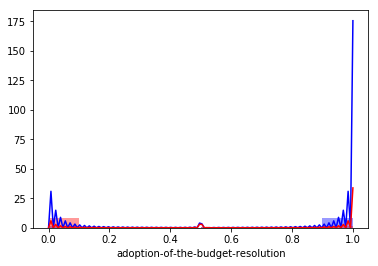

In [54]:

#Hypothesis is Democrats are going to support adoption-of-the-budget-resolution  more than republicans
from scipy.stats import ttest_ind, ttest_ind_from_stats
 #draw samples
  
democrat=votingdatadem['adoption-of-the-budget-resolution'].sample(n=100,random_state=1)

republican=votingdatarep['adoption-of-the-budget-resolution'].sample(n=100,random_state=1)
  #Plot distribution
sns.distplot(democrat, color='b')
sns.distplot(republican, color='r');

#tstat
tstat,pvalue = ttest_ind(democrat, republican)


print(tstat)
print(pvalue)



P value is smaller than 0.01

##3.Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01

-13.249258739373202
4.195390185560579e-29


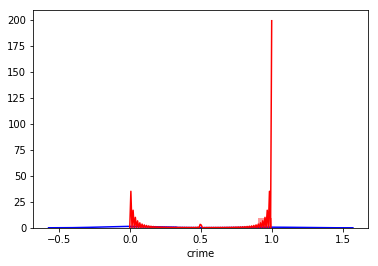

In [55]:

#Hypothesis is Republicans are going to support adoption-of-the-budget-resolution  more than democrats
from scipy.stats import ttest_ind, ttest_ind_from_stats
 #draw samples
  
democrat=votingdatadem['crime'].sample(n=100,random_state=1)

republican=votingdatarep['crime'].sample(n=100,random_state=1)
  #Plot distribution
sns.distplot(democrat, color='b')
sns.distplot(republican, color='r');

#tstat
tstat,pvalue = ttest_ind(democrat, republican)


print(tstat)
print(pvalue)


##4.Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

-1.2159474665603573
0.22545262139065872


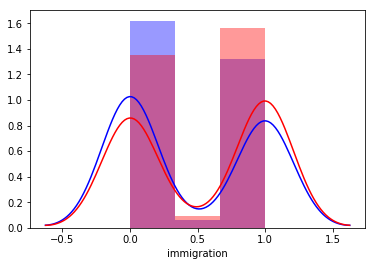

In [56]:

#Hypothesis is the difference between republicans and democrats is insignificant
from scipy.stats import ttest_ind, ttest_ind_from_stats
 #draw samples
  
democrat=votingdatadem['immigration'].sample(n=100,random_state=1)

republican=votingdatarep['immigration'].sample(n=100,random_state=1)

#Plot distribution
sns.distplot(democrat, color='b')
sns.distplot(republican, color='r');

#tstat
tstat,pvalue = ttest_ind(democrat, republican)


print(tstat)
print(pvalue)

The P-value is greater than 0.1 proving that our null hypothesis is true. Therefore, there isn't much of a difference between republicans and democrats on this issue.

##Stretch 1.Refactor your code into functions so it's easy to rerun with arbitrary variables


In [57]:
votingdata.head()

,Class_Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [80]:
for feat in votingdata.columns.drop('Class_Name'):
  #split groups
    group1= votingdata[votingdata['Class_Name']=='democrat'][feat]
    group2= votingdata[votingdata['Class_Name']=='republican'][feat]
#runt t-test
    tstat, pvalue = ttest_ind(group1,group2)
    print(f'Feat:{feat}')
    print(f'tstat:{tstat}')
    print(f'pvalue:{pvalue}')
    print('-----')

Feat:handicapped-infants
tstat:9.22317772154614
pvalue:1.2761169357253626e-18
-----
Feat:water-project-cost-sharing
tstat:-0.08764559884421878
pvalue:0.9301988772663682
-----
Feat:adoption-of-the-budget-resolution
tstat:22.821693043884803
pvalue:2.872115314395808e-76
-----
Feat:physician-fee-freeze
tstat:-46.10191006844654
pvalue:3.967141133302638e-169
-----
Feat:el-salvador-aid
tstat:-20.895617123040896
pvalue:1.4659659186479053e-67
-----
Feat:religious-groups-in-schools
tstat:-9.815876256106362
pvalue:1.142999405504256e-20
-----
Feat:anti-satellite-test-ban
tstat:12.448556296273836
pvalue:1.2736295885307941e-30
-----
Feat:aid-to-nicaraguan-contras
tstat:17.791848422270405
pvalue:1.4948014750035628e-53
-----
Feat:mx-missile
tstat:16.326540222505365
pvalue:4.863267267891218e-47
-----
Feat:immigration
tstat:-1.7350166356866614
pvalue:0.08344939720307315
-----
Feat:synfuels-corporation-cutback
tstat:8.20071170109401
pvalue:2.7434037173701792e-15
-----
Feat:education-spending
tstat:-19.74

##stretch 2.Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [82]:
from sklearn.datasets import load_diabetes

x=load_diabetes()

x

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [84]:
diabetes = pd.DataFrame(x['data'],columns=x['feature_names'])

print(diabetes.shape)
diabetes.head()



(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [85]:
diabetes.age.value_counts()

 0.016281    19
 0.041708    17
 0.009016    16
-0.027310    15
 0.045341    14
 0.012648    14
-0.052738    14
-0.001882    14
 0.005383    13
 0.067136    13
 0.001751    12
 0.023546    12
-0.005515    12
 0.030811    12
-0.009147    11
-0.041840    11
 0.019913    11
 0.048974    11
-0.023677    10
 0.038076    10
 0.034443     9
 0.027178     9
-0.045472     9
-0.074533     8
 0.059871     7
-0.060003     7
-0.020045     7
-0.049105     7
-0.016412     7
 0.070769     7
-0.056370     6
-0.034575     6
-0.038207     6
 0.063504     6
 0.074401     6
-0.070900     6
-0.085430     5
 0.056239     5
-0.030942     5
 0.081666     5
-0.092695     4
-0.096328     4
-0.063635     4
 0.052606     4
-0.012780     4
-0.078165     4
-0.067268     3
-0.103593     3
-0.089063     3
-0.107226     3
-0.099961     2
 0.110727     2
-0.081798     2
 0.096197     2
 0.092564     1
 0.078034     1
 0.088931     1
 0.085299     1
Name: age, dtype: int64

In [87]:
for feat in diabetes.columns.drop('age'):
  #split groups
    group1= diabetes[diabetes['age']>=0][feat]
    group2= diabetes[diabetes['age']<0][feat]
#runt t-test
    tstat, pvalue = ttest_ind(group1,group2)
    print(f'Feat:{feat}')
    print(f'tstat:{tstat}')
    print(f'pvalue:{pvalue}')
    print('-----')

Feat:sex
tstat:3.404486366305998
pvalue:0.0007236374318887803
-----
Feat:bmi
tstat:2.5069502917698836
pvalue:0.01253727979901719
-----
Feat:bp
tstat:5.887568585433253
pvalue:7.78483721562064e-09
-----
Feat:s1
tstat:3.5219451753904565
pvalue:0.00047315101143034603
-----
Feat:s2
tstat:2.909922588736801
pvalue:0.0037985468153659153
-----
Feat:s3
tstat:-1.0908238586788404
pvalue:0.27594738102154504
-----
Feat:s4
tstat:2.7240680755919673
pvalue:0.006705072343352235
-----
Feat:s5
tstat:4.004950296748262
pvalue:7.281134456419638e-05
-----
Feat:s6
tstat:4.5906881302239375
pvalue:5.773096982349647e-06
-----
